In [4]:
import pandas as pd
column_name = ['Id','Name','Age','Weight','m0006','m0612','m1218','f0006','f0612','f1218']
df = pd.read_csv('patient_heart_rate.csv', header=0, names = column_name)
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop('Name',axis=1)


In [7]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [8]:
weight = df['Weight']
for i in range(0, len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        y = int(float_x/2.2)
        weight[i]=y
    if 'kgs' in x[-3:]:
        x=x[:-3:]
        float_x = float(x)
        weight[i]=x

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3234638313.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=x
C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3234638313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=y
C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3234638313.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=x
C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\3234638313.py:8: Set

In [9]:
df.rename(columns={'Weight':'Weight_kgs'}, inplace=True)

In [10]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [11]:
df.dropna(how='all', inplace=True)

In [12]:
df = df.drop_duplicates(subset=['Firstname','Lastname','Age','Weight_kgs'])

In [13]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print (df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\4272727376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\4272727376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [14]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\1258158026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [15]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1696\1979542691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


In [64]:
df= pd.melt(df, id_vars=['Id','Age','Weight_kgs','Firstname','Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id','Age','Weight_kgs','Firstname','Lastname'])


In [65]:
df.head()

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-


In [66]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15340\394222301.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)


In [67]:
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']

In [68]:
df = pd.concat([df,df_temp], axis=1)

In [69]:
df = df.drop(['gender_time'],axis=1)

In [70]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12
...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,-,m,06,12
41,15.0,52.0,81,NaN,NaN,-,m,12,18
55,15.0,52.0,81,NaN,NaN,68,f,00,06
69,15.0,52.0,81,NaN,NaN,75,f,06,12


In [71]:
import numpy as np
df = df.replace('-',np.nan).dropna(subset=['PulseRate'])
df.head()

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12


In [73]:
df['Firstname'].isnull().sum()
df['Lastname'].isnull().sum()
df['Firstname'].fillna('Unknown', inplace=True)
df['Lastname'].fillna('Unknown', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15340\2068834411.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lastname'].fillna('Unknown', inplace=True)


In [74]:
df = df.reset_index()

In [75]:
df.to_csv('patient_heart_rate_clean.csv')

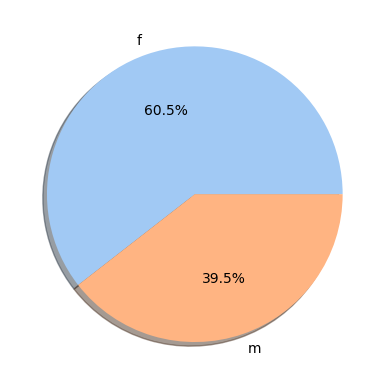

In [16]:
#Cau 1:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('patient_heart_rate_clean.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

gb = df.groupby(['Gender'])['Gender'].agg(['count'])

labels = gb.index 
data = list(gb['count'])

colors = sns.color_palette('pastel') 

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

In [17]:
# Cau 2
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
df.head(5)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,0,1.0,56.0,70.0,Micky,Mous,72,m,0,6,Micky Mous
1,1,14,1.0,56.0,70.0,Micky,Mous,69,m,6,12,Micky Mous
2,2,28,1.0,56.0,70.0,Micky,Mous,71,m,12,18,Micky Mous
3,3,43,2.0,34.0,70.0,Donald,Duck,85,f,0,6,Donald Duck
4,4,57,2.0,34.0,70.0,Donald,Duck,84,f,6,12,Donald Duck


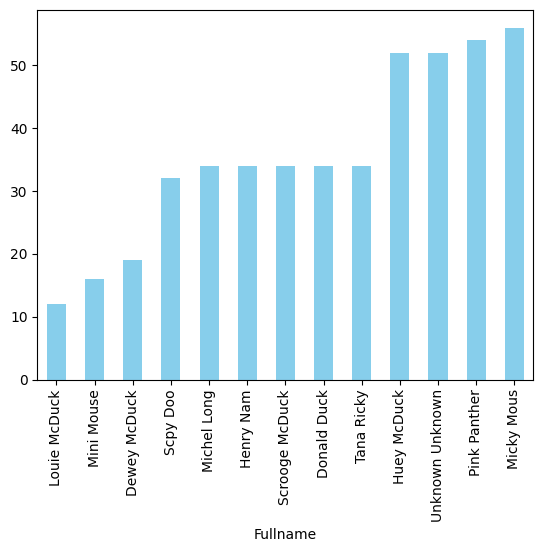

In [52]:
#Câu 3: 
age_by_name = df.groupby('Fullname')['Age'].mean()
age_by_name = age_by_name.sort_values()

age_by_name.plot(kind='bar', color='skyblue')
plt.show()

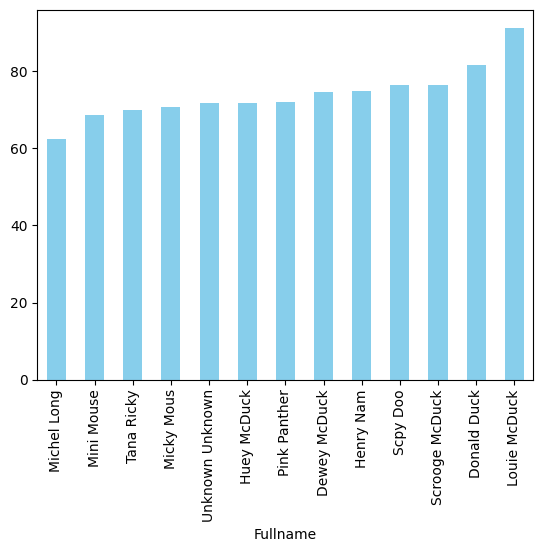

In [51]:
# Cau 4
avg_pulse_rate = df.groupby('Fullname')['PulseRate'].mean().sort_values()
avg_pulse_rate.plot(kind='bar', color='skyblue')
plt.show()

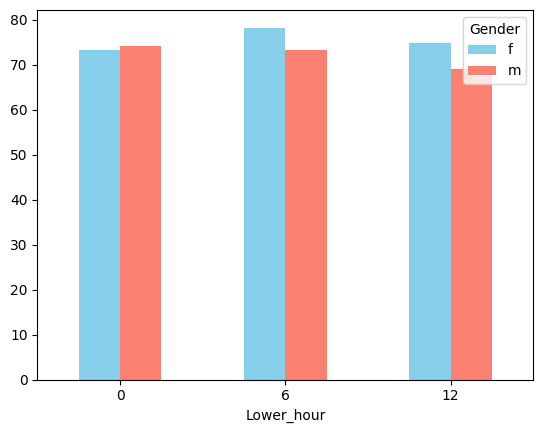

In [54]:
#Cau 5
avg_pulse_by_hour_gender = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().unstack()

avg_pulse_by_hour_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=0)

plt.show()

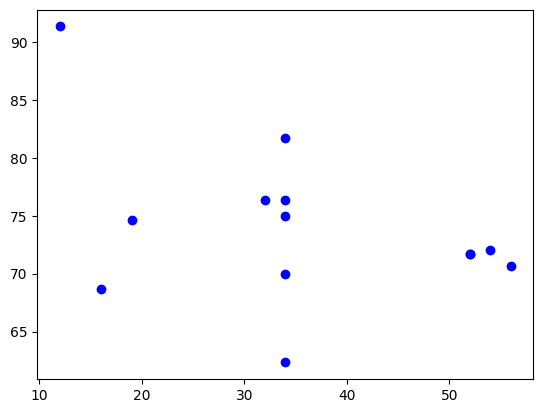

In [49]:
#Cau 6
avg_age_pulse = df.groupby('Id')[['Age', 'PulseRate']].mean()
plt.scatter(avg_age_pulse['Age'], avg_age_pulse['PulseRate'], color='blue')
plt.show()

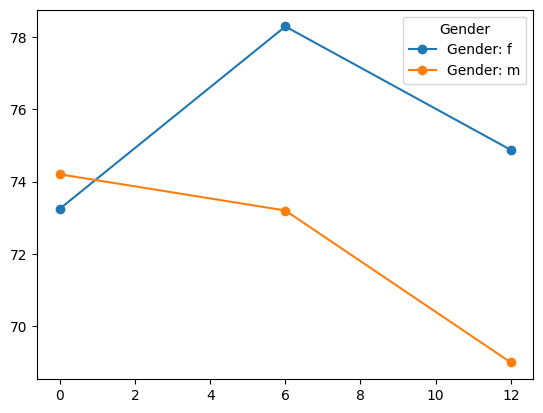

In [55]:
#Cau 7
avg_pulse_by_hour_gender = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().unstack()
for gender in avg_pulse_by_hour_gender.columns:
    plt.plot(avg_pulse_by_hour_gender.index, avg_pulse_by_hour_gender[gender], marker='o', label=f'Gender: {gender}')

plt.legend(title='Gender')
plt.show()